
<div class="note">
    <p style="margin-top: 0; margin-bottom: 0;">
        <img style="margin-top: 0; margin-bottom: 0; height: 2em;" class="inline-block mr-2 no-fancybox"
            src="https://upload.wikimedia.org/wikipedia/commons/3/38/Jupyter_logo.svg" alt="">
        This page is based on a Jupyter notebook.
<a href="./confined_gas_compression.ipynb" download="confined_gas_compression.ipynb"><img class="no-fancybox" style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;" src="https://img.shields.io/static/v1?label=Download:&message=confined_gas_compression.ipynb&color=blue" /></a>
<a href="https://gitlab.opengeosys.org/ogs/ogs/-/blob/master/Tests/Data/TH2M/TH/idealGasLaw/confined_gas_compression.py"><img src="https://img.shields.io/static/v1?label=Source:&message=confined_gas_compression.py&color=brightgreen" class="no-fancybox"
        style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;" /></a>
<a href="https://binder.opengeosys.org/v2/gh/bilke/binder-ogs-requirements/6.5.6-0.7.0?urlpath=git-pull%3Frepo=https://gitlab.opengeosys.org/ogs/ogs%26urlpath=lab/tree/ogs/Tests/Data/TH2M/TH/idealGasLaw/confined_gas_compression.py%26branch=6.5.6%26depth=1">
    <img class="no-fancybox" style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;"
        src="https://img.shields.io/static/v1?label=&message=Launch notebook&color=5c5c5c&logo=" />
</a></p></div>

|<div style="width:330px"><img src="https://www.ufz.de/static/custom/weblayout/DefaultInternetLayout/img/logos/ufz_transparent_de_blue.png" width="300"/></div>|<div style="width:330px"><img src="https://discourse.opengeosys.org/uploads/default/original/1X/a288c27cc8f73e6830ad98b8729637a260ce3490.png" width="300"/></div>|<div style="width:330px"><img src="https://github.com/nagelt/Teaching_Scripts/raw/9d9e29ecca4b04eaf7397938eacbf116d37ddc93/Images/TUBAF_Logo_blau.png" width="300"/></div>|
|---|---|--:|

# Confined compression of a cube

In this test, the thermodynamic relationships between gas pressure, temperature and density are tested.
For that, a cube-shaped domain consisting of an ideal gas is compressed by 50\% of its initial volume over a short period of time, starting from the top surface.
The boundaries of that domain are impermeable to fluid flow, therefore gas pressure and density must increase as a result of the decreasing volume.
Since energy flow across the boundaries is also prevented, this compression is an adiabatic change of state. No frictional losses are taken into account, so the process can be reversed at any time and the entropy in the overall system remains constant.

## Analytical solution

### Density evolution

The mass balance for such a system can be found by simplifying the mass balance (eq. 44 in Grunwald et al., 2022). With
$\phi=s_\mathrm{G}=\alpha_\mathrm{B}=1$ and $\mathrm{A}^\zeta_\alpha=\mathrm{J}^\zeta_\alpha=0$
one obtains
$$
0=\rho_\mathrm{GR}\mathrm{div}\left(\mathbf{u}_\mathrm{S}\right)'_\mathrm{S}+\left(\rho_\mathrm{GR}\right)'_\mathrm{S}
$$

With volume strain $e=\text{div}\left(\mathbf{u}_\text{S}\right)'_\text{S}$ we write
$$
\frac{1}{\rho_\text{GR}}\left(\rho_\text{GR}\right)'_\text{S}=-e,
$$
which can be integrated
$$
\int^{\rho_\text{GR}}_{\rho_{\text{GR},0}}\frac{1}{\rho_\text{GR}}\text{d}\,\rho_\text{GR}=-e
$$
so that we find
$$
\ln\left(\rho_\text{GR}\right) - \ln\left(\rho_{\text{GR},0}\right) = -e
$$
or
$$
\rho_\text{GR}=\rho_{\text{GR},0}\exp\left(-e\right).
$$

### Gas pressure evolution

The evolution of gas pressure can be found from energy balance equation (eq. 51 in the paper):
Starting from
$$
\left(\Sigma_\alpha\rho_\alpha u_\alpha\right)'_\text{S}
+\left(\Sigma_\alpha\rho_\alpha h_\alpha\right)\text{div}\left(\mathbf{u}_\text{S}\right)'_\text{S}
=0,
$$
with $u_\text{S}=h_\text{S}$ and $u_\text{G}=h_\text{G}-\frac{p_\text{GR}}{\rho_\text{GR}}$ and with $h_\alpha=c_{p,\alpha}T$. Considering that $\phi_\alpha=\text{const}$ and $c_{p,\text{S}}=0$, we find
$$
\left(\rho_\text{GR}\right)'_\text{S}\left(c_{p,\text{G}}T-p_\text{GR}\rho_\text{GR}^{-1}\right)
+
\rho_\text{GR}\left(c_{p,\text{G}}T-p_\text{GR}\rho_\text{GR}^{-1}\right)'_\text{S}
+
\rho_\text{GR}c_{p,\text{G}}Te=0.
$$
Assuming ideal gas behaviour, we can write $\frac{p_\text{GR}}{\rho_\text{GR}}=\frac{M}{RT}$ and find
$$
\left(\rho_\text{GR}\right)'_\text{S}c_{v,\text{G}}T
+
\rho_\text{GR}\left(c_{v,\text{G}}T\right)'_\text{S}
+
\rho_\text{GR}c_{p,\text{G}}Te=0.
$$
With $c_{v,\text{G}}=\text{const}$ it follows
$$
\frac{\rho_\text{GR}}{p_\text{GR}}\left(p_\text{GR}\right)'_\text{S}c_{v,\text{G}}T
+
\rho_\text{GR}c_{p,\text{G}}Te=0.
$$
Density and temperature cancel out so the final equation can be written as
$$
\frac{1}{p_\text{GR}}\left(p_\text{GR}\right)'_\text{S}
=-\kappa e
$$
with the adiabatic index $\kappa = \frac{c_v}{c_p}$. The equation can be integrated to find the solution for the pressure evolution
$$
p_\text{GR}=p_{\text{GR},0}\exp\left(-\kappa e\right)
$$

### Temperature evolution

The temperature evolution follows _Poissons_ equations for isentropic processes
$$
T=T_0\left(\frac{p_\text{GR}}{p_{\text{GR},0}}\right)^{\frac{\kappa-1}{\kappa}}.
$$

In [1]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import ogstools as ot

out_dir = Path(os.environ.get("OGS_TESTRUNNER_OUT_DIR", "_out"))
out_dir.mkdir(parents=True, exist_ok=True)

In [2]:
p_0 = 1e6
T_0 = 270
R = 8.3144621
M = 0.01
c_p = 1000

c_v = c_p - R / M
rho_0 = p_0 * M / R / T_0
kappa = c_p / c_v


def volume_strain(t):
    return -t / 100


def gas_density(t):
    return rho_0 * np.exp(-volume_strain(t))


def gas_pressure(t):
    return p_0 * np.exp(-kappa * volume_strain(t))


def temperature(t):
    return gas_pressure(t) * M / R / gas_density(t)

## Numerical solution

In [3]:
# run OGS
cube_compression = ot.Project(
    input_file="compression_gas.prj", output_file="compression_gas.prj"
)
cube_compression.run_model(logfile=f"{out_dir}/out.txt", args=f"-o {out_dir}")

Project file written to output.
Simulation: compression_gas.prj
Status: finished successfully.
Execution took 0.281998872756958 s


In [4]:
# read PVD file
ms = ot.MeshSeries(f"{out_dir}/result_compression_gas.pvd")
time = ms.timevalues


def plot_results_errors(var: ot.variables.Scalar, ref_vals: np.ndarray):
    "Plot numerical results, analytical solution and errors."
    num_vals = ms.probe([0.0, 1.0, 0.0], var.data_name)
    abs_err = ref_vals - num_vals
    rel_err = abs_err / ref_vals
    assert np.all(np.abs(rel_err) <= 0.002)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax3 = ax2.twinx()
    ax1.set_xlabel(r"$t$ / s")
    ax2.set_xlabel(r"$t$ / s")
    ax1.set_ylabel(var.get_label())
    ax2.set_ylabel("absolute error / " + var.data_unit)
    ax3.set_ylabel("relative error")

    ax1.plot(time, var.transform(num_vals), "kx", label="numerical")
    ax1.plot(time, var.transform(ref_vals), "b", label="analytical")
    lns_abs = ax2.plot(time, abs_err, "b", label=r"absolute")
    lns_rel = ax3.plot(time, rel_err, "g", label=r"relative")
    ax1.legend()
    lns = lns_abs + lns_rel
    ax2.legend(lns, [label.get_label() for label in lns])

    fig.tight_layout()

## Gas density evolution

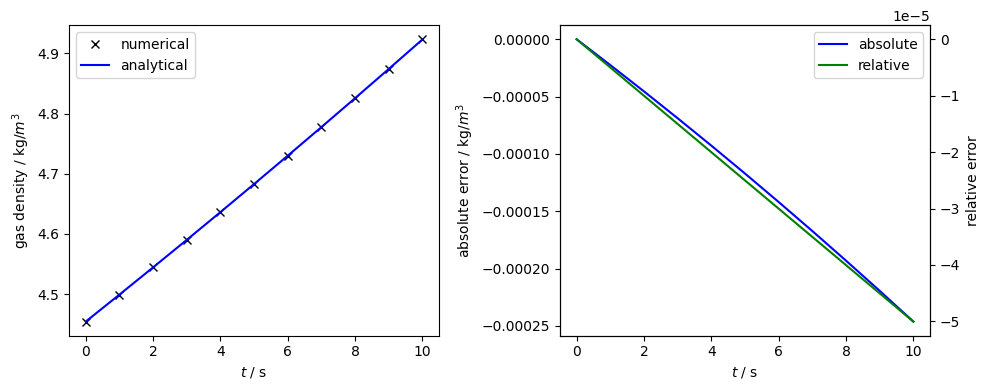

In [5]:
rho_g = ot.variables.Scalar("gas_density", r"kg/$m^3$", r"kg/$m^3$")
plot_results_errors(rho_g, gas_density(ms.timevalues))

## Gas pressure evolution

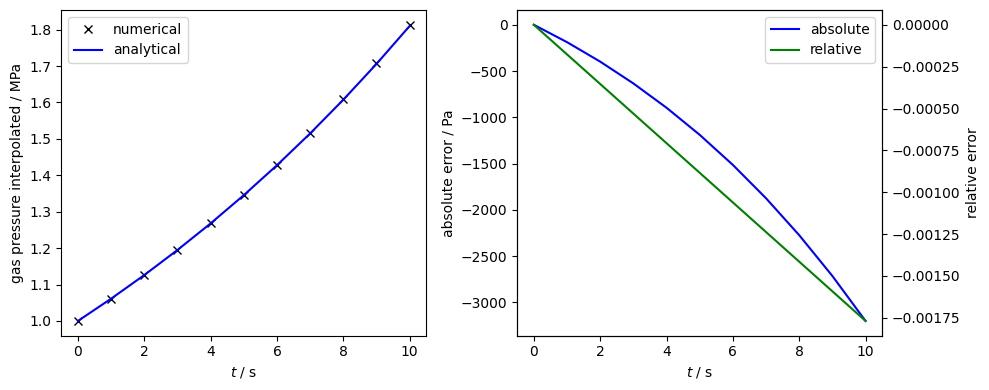

In [6]:
p_g = ot.variables.Scalar("gas_pressure_interpolated", "Pa", "MPa")
plot_results_errors(p_g, gas_pressure(ms.timevalues))

## Temperature evolution

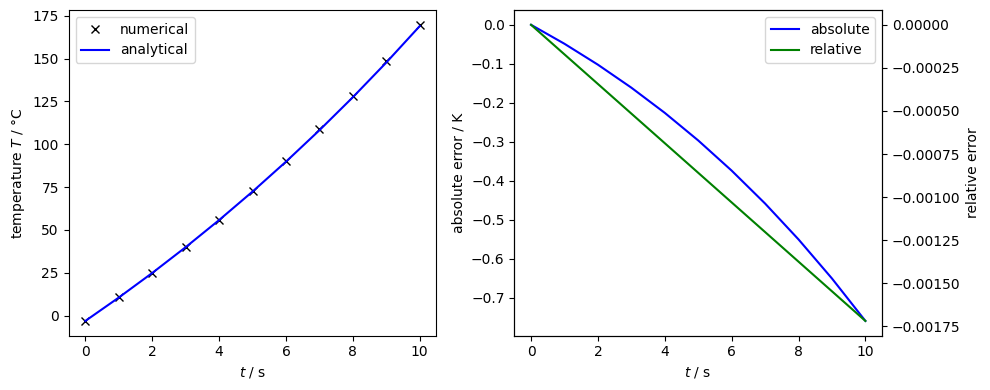

In [7]:
plot_results_errors(ot.variables.temperature, temperature(ms.timevalues))